In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

## Zero-shot Indirect Effect

### prob

In [2]:
with open('./dataset/intervention_data/gpt2_train=False_prob.json','rb') as f:
    entropy = json.load(f)
len(entropy)

4412

In [3]:
total_data = pd.read_csv('./dataset/intervention_data/gpt2_train=False_Total.csv')
positive_effect = total_data.loc[total_data['prob']>0].index
negative_effect = total_data.loc[total_data['prob']<0].index

In [4]:
entropy.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', 

In [5]:
layer = [f'layer {i}' for i in range(13)]
neuron = [f'neuron {i}' for i in range(768)]
sample_length = len(entropy)

In [6]:
df_list = []
mean_df = pd.DataFrame(np.zeros((len(neuron),len(layer))),index = neuron, columns = layer)
var_arr = np.zeros((sample_length,len(neuron),len(layer)))
for idx,(_,v) in enumerate(entropy.items()):
    if idx in positive_effect:
        df = pd.DataFrame(v, index = neuron, columns=layer)
        df_list.append(df)
        mean_df+=df

        v_arr = np.array(v)
        var_arr[idx,:,:] = v_arr
var_df = pd.DataFrame(var_arr.std(axis=0), index = neuron, columns=layer)
mean_df = mean_df/len(positive_effect)
    

In [7]:
mean_df

,layer 0,layer 1,layer 2,layer 3,layer 4,layer 5,layer 6,layer 7,layer 8,layer 9,layer 10,layer 11,layer 12
neuron 0,-0.001920,0.000272,0.002443,0.005520,-0.000441,0.000721,0.000522,0.000346,0.000647,0.000590,0.000552,0.000865,-0.000017
neuron 1,-0.000339,-0.006278,0.000912,-0.000826,-0.000409,0.000542,0.000891,0.001205,0.001049,0.000645,0.000181,-0.000210,-0.000579
neuron 2,0.000996,0.006502,0.006293,0.004266,0.000518,-0.001341,0.000211,0.000287,0.000791,-0.000147,0.000654,-0.000121,-0.001015
neuron 3,0.000802,-0.000422,0.003808,-0.000786,0.001672,0.000046,0.000433,0.000152,0.000375,-0.000031,0.000784,-0.000113,0.000357
neuron 4,0.006334,0.002058,0.002682,0.002590,0.000523,0.000977,0.001823,-0.001864,-0.000157,0.000285,0.000424,-0.000116,0.000156
...,...,...,...,...,...,...,...,...,...,...,...,...,...
neuron 763,0.001353,0.005517,-0.007303,-0.001390,-0.001361,-0.000734,-0.000622,-0.000082,0.000606,0.000395,0.000485,0.000212,0.000189
neuron 764,-0.004641,0.000072,-0.000032,0.000840,0.000067,0.000654,0.001077,0.000355,0.000039,0.000671,0.000030,0.000737,-0.000689
neuron 765,0.010079,0.003599,-0.002598,0.000997,-0.001287,0.000237,0.000472,0.000650,0.000306,-0.000038,0.000979,-0.001038,0.000057
neuron 766,0.007631,0.000701,0.000762,0.000536,-0.000295,0.000345,-0.000843,0.000311,0.000194,-0.000152,-0.000146,0.000040,-0.000017


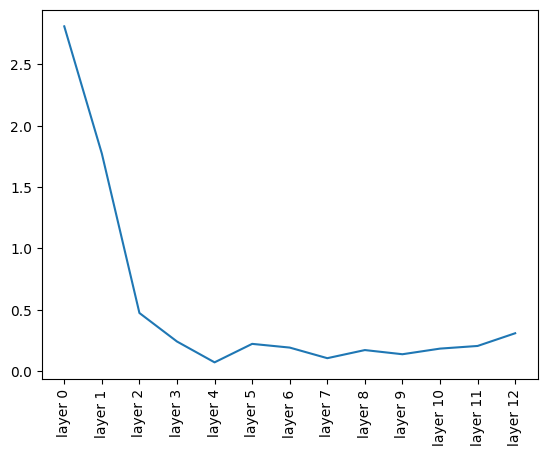

In [8]:
sns.lineplot(mean_df.sum(axis=0))
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot: >

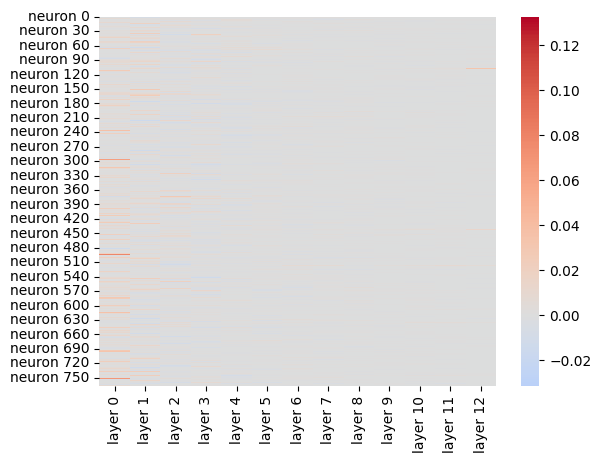

In [9]:
sns.heatmap(mean_df,cmap='coolwarm',center=0)

<AxesSubplot: >

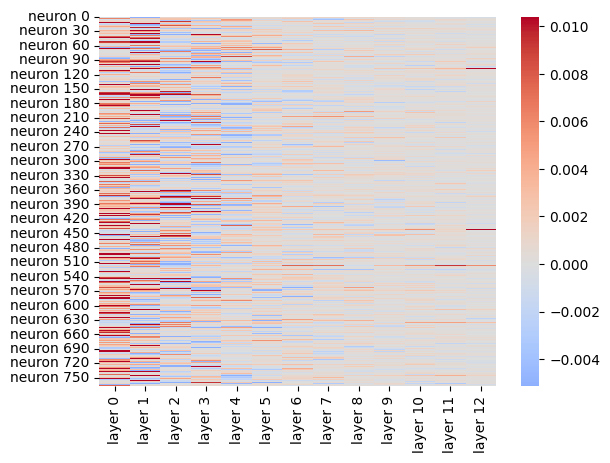

In [10]:
sns.heatmap(mean_df,cmap='coolwarm',center=0,robust=True)

<AxesSubplot: >

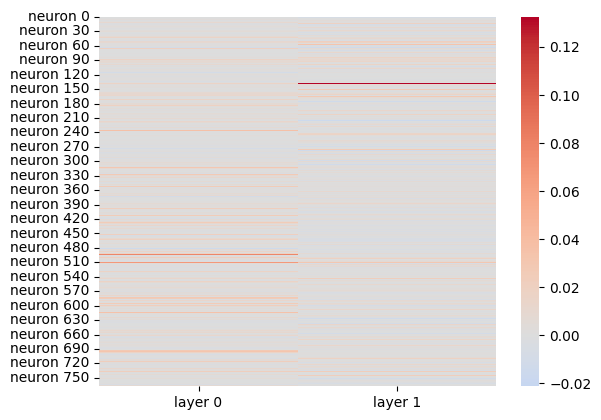

In [11]:
sns.heatmap(mean_df.iloc[:,:2],cmap='coolwarm',center=0)

<AxesSubplot: >

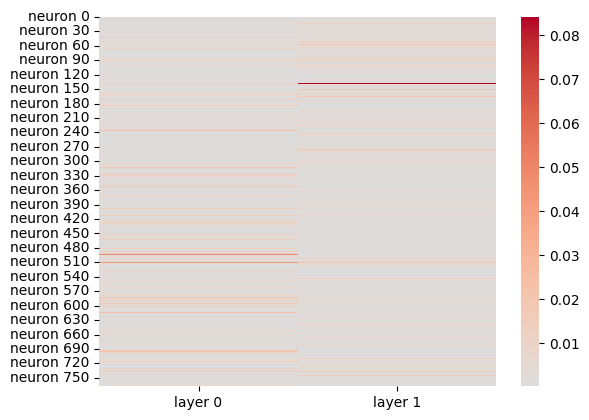

In [12]:
sns.heatmap(var_df.iloc[:,:2],cmap='coolwarm',center=0)

## Fine tuning Indirect Effect

### entropy

In [13]:
with open('./dataset/intervention_data/gpt2_train=True_prob.json','rb') as f:
    entropy = json.load(f)
len(entropy)

4412

In [14]:
total_data = pd.read_csv('./dataset/intervention_data/gpt2_train=True_Total.csv')
positive_effect = total_data.loc[total_data['prob']>0].index
negative_effect = total_data.loc[total_data['prob']<0].index

In [15]:
entropy.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', 

In [16]:
layer = [f'layer {i}' for i in range(13)]
neuron = [f'neuron {i}' for i in range(768)]
sample_length = len(entropy)

In [17]:
fine_df_list = []
fine_mean_df = pd.DataFrame(np.zeros((len(neuron),len(layer))),index = neuron, columns = layer)
fine_var_arr = np.zeros((sample_length,len(neuron),len(layer)))
for idx,(_,v) in enumerate(entropy.items()):
    if idx in positive_effect:
        df = pd.DataFrame(v, index = neuron, columns=layer)
        fine_df_list.append(df)
        fine_mean_df+=df

        v_arr = np.array(v)
        fine_var_arr[idx,:,:] = v_arr
fine_var_df = pd.DataFrame(fine_var_arr.std(axis=0), index = neuron, columns=layer)
fine_mean_df = fine_mean_df/len(positive_effect)
    

In [18]:
len(fine_df_list)

4278

In [19]:
fine_mean_df

,layer 0,layer 1,layer 2,layer 3,layer 4,layer 5,layer 6,layer 7,layer 8,layer 9,layer 10,layer 11,layer 12
neuron 0,0.000049,0.000230,0.000165,-0.000094,-0.000064,-0.000042,-0.000201,-0.000109,-0.000032,0.000098,0.000029,0.000112,-4.758535e-05
neuron 1,0.000024,-0.000291,0.000009,-0.000032,0.000055,-0.000016,-0.000016,0.000032,0.000154,-0.000132,-0.000030,-0.000069,-5.860706e-05
neuron 2,-0.000146,0.000276,-0.000030,0.000054,0.000026,0.000103,0.000055,-0.000011,0.000131,0.000021,-0.000034,-0.000021,5.769543e-05
neuron 3,-0.000731,-0.000034,0.000066,-0.000118,-0.000023,-0.000055,0.000076,0.000063,-0.000030,0.000044,-0.000006,-0.000095,-6.258752e-07
neuron 4,0.000058,0.000065,-0.000051,-0.000016,0.000237,0.000023,-0.000057,-0.000110,-0.000039,-0.000147,-0.000222,-0.000077,-3.849876e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
neuron 763,0.000356,0.000282,-0.000046,0.000013,-0.000134,0.000018,-0.000004,-0.000081,-0.000070,-0.000086,-0.000032,0.000053,2.107865e-04
neuron 764,-0.000060,-0.000330,-0.000021,-0.000005,0.000088,-0.000067,0.000025,0.000040,-0.000034,-0.000066,-0.000139,-0.000154,6.775434e-05
neuron 765,0.000210,-0.000084,-0.000001,0.000011,0.000187,0.000295,0.000182,0.000293,0.000254,0.000168,-0.000020,0.000470,3.765216e-04
neuron 766,0.002283,0.000173,-0.000072,-0.000006,-0.000066,-0.000041,0.000002,-0.000012,0.000020,-0.000013,-0.000005,-0.000007,-5.391067e-06


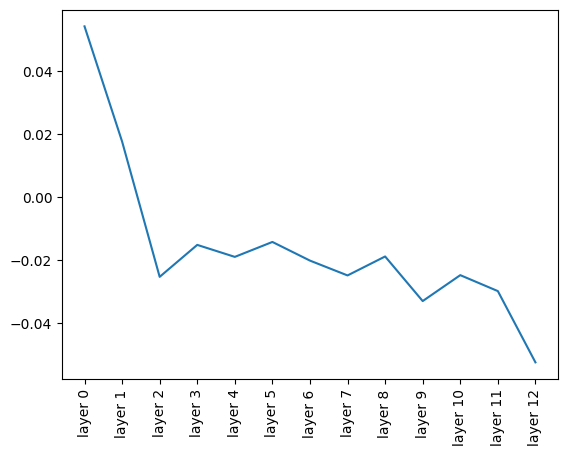

In [20]:
sns.lineplot(fine_mean_df.sum(axis=0))
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot: >

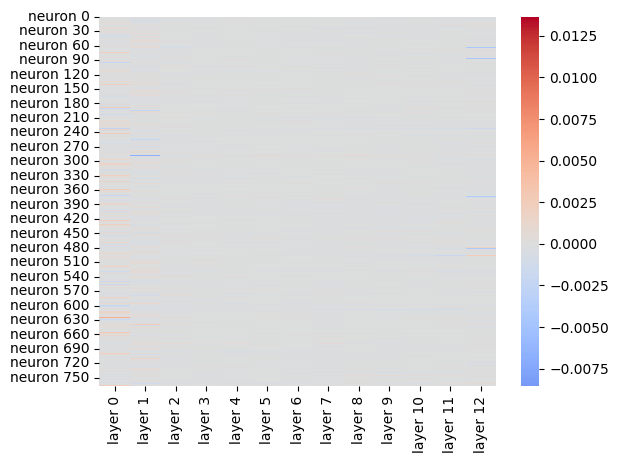

In [21]:
sns.heatmap(fine_mean_df,cmap='coolwarm',center=0)

<AxesSubplot: >

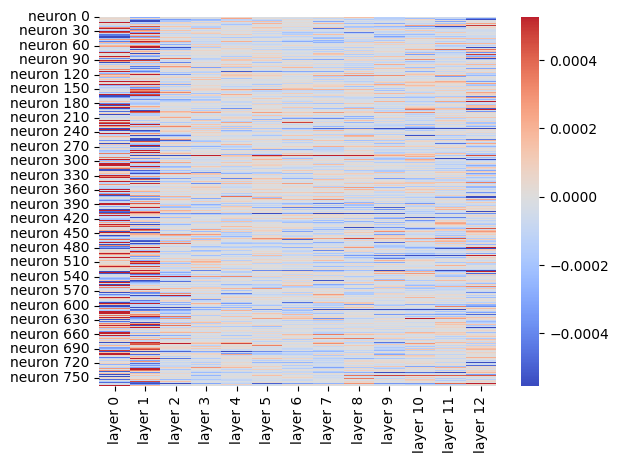

In [22]:
sns.heatmap(fine_mean_df,cmap='coolwarm',center=0,robust=True)

<AxesSubplot: >

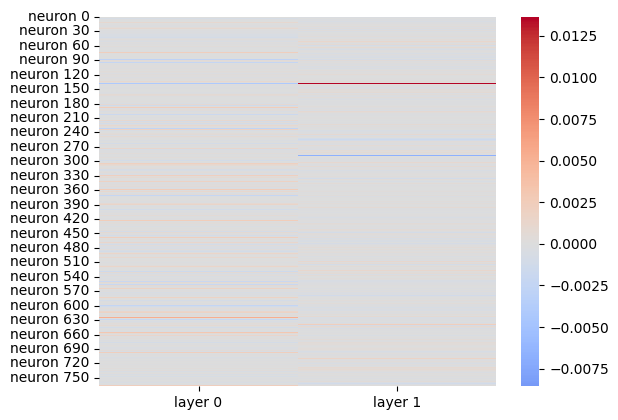

In [23]:
sns.heatmap(fine_mean_df.iloc[:,:2],cmap='coolwarm',center=0)

<AxesSubplot: >

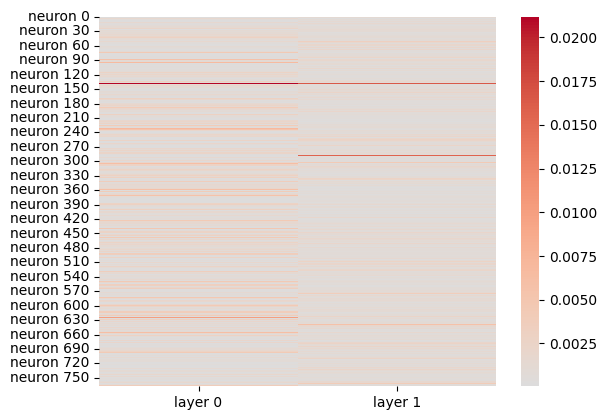

In [24]:
sns.heatmap(fine_var_df.iloc[:,:2],cmap='coolwarm',center=0)

### Fine tuning 전,후 비교

In [25]:
# fine tuning 전
display(mean_df.iloc[:,0].sort_values(ascending=False).head(20))
display(mean_df.iloc[:,1].sort_values(ascending=False).head(20))

neuron 494    0.077566
neuron 752    0.067275
neuron 510    0.067067
neuron 297    0.062707
neuron 65     0.043111
neuron 236    0.037051
neuron 264    0.036468
neuron 345    0.036072
neuron 614    0.035314
neuron 572    0.034450
neuron 695    0.033443
neuron 162    0.032824
neuron 313    0.030684
neuron 437    0.030517
neuron 364    0.029331
neuron 693    0.028570
neuron 583    0.028563
neuron 177    0.028053
neuron 233    0.027732
neuron 327    0.027253
Name: layer 0, dtype: float64

neuron 138    0.132555
neuron 372    0.092616
neuron 92     0.086365
neuron 503    0.060982
neuron 48     0.036352
neuron 57     0.034054
neuron 510    0.030720
neuron 151    0.028863
neuron 165    0.028656
neuron 264    0.027508
neuron 275    0.026309
neuron 164    0.025864
neuron 737    0.024311
neuron 441    0.023933
neuron 430    0.023732
neuron 745    0.022241
neuron 544    0.022100
neuron 615    0.021762
neuron 35     0.021625
neuron 51     0.020968
Name: layer 1, dtype: float64

In [26]:
# fine tuning 후
display(fine_mean_df.iloc[:,0].sort_values(ascending=False).head(20))
display(fine_mean_df.iloc[:,1].sort_values(ascending=False).head(20))

neuron 625    0.005369
neuron 264    0.005142
neuron 362    0.004300
neuron 181    0.003620
neuron 106    0.003185
neuron 656    0.003143
neuron 233    0.002808
neuron 243    0.002786
neuron 359    0.002617
neuron 432    0.002544
neuron 185    0.002528
neuron 423    0.002469
neuron 188    0.002440
neuron 426    0.002435
neuron 141    0.002368
neuron 262    0.002331
neuron 458    0.002301
neuron 572    0.002297
neuron 74     0.002287
neuron 766    0.002283
Name: layer 0, dtype: float64

neuron 138    0.013654
neuron 92     0.004067
neuron 570    0.003148
neuron 639    0.002314
neuron 532    0.001948
neuron 526    0.001778
neuron 399    0.001670
neuron 710    0.001614
neuron 264    0.001545
neuron 233    0.001510
neuron 441    0.001273
neuron 596    0.001253
neuron 51     0.001240
neuron 527    0.001165
neuron 152    0.001147
neuron 508    0.001082
neuron 343    0.001065
neuron 35     0.001019
neuron 9      0.001015
neuron 478    0.001011
Name: layer 1, dtype: float64

In [27]:
# fine tuning 전
display(mean_df.iloc[:,0].sort_values(ascending=False).tail(20))
display(mean_df.iloc[:,1].sort_values(ascending=False).tail(20))

neuron 576   -0.004857
neuron 419   -0.004989
neuron 628   -0.005070
neuron 454   -0.005084
neuron 135   -0.005125
neuron 355   -0.005502
neuron 666   -0.006059
neuron 447   -0.007245
neuron 480   -0.007996
neuron 87    -0.008037
neuron 64    -0.008070
neuron 40    -0.008100
neuron 395   -0.009120
neuron 273   -0.009126
neuron 115   -0.009234
neuron 373   -0.009447
neuron 622   -0.010468
neuron 266   -0.012880
neuron 38    -0.013689
neuron 481   -0.013771
Name: layer 0, dtype: float64

neuron 630   -0.009882
neuron 658   -0.010033
neuron 160   -0.010112
neuron 637   -0.010376
neuron 331   -0.010387
neuron 298   -0.010671
neuron 751   -0.010695
neuron 684   -0.011248
neuron 307   -0.011280
neuron 250   -0.012242
neuron 729   -0.012433
neuron 627   -0.012579
neuron 64    -0.012811
neuron 176   -0.013195
neuron 586   -0.013366
neuron 278   -0.013803
neuron 526   -0.015197
neuron 215   -0.015853
neuron 169   -0.018505
neuron 322   -0.021194
Name: layer 1, dtype: float64

In [28]:
# fine tuning 후
display(fine_mean_df.iloc[:,0].sort_values(ascending=False).tail(20))
display(fine_mean_df.iloc[:,1].sort_values(ascending=False).tail(20))

neuron 663   -0.001285
neuron 345   -0.001477
neuron 341   -0.001495
neuron 100   -0.001531
neuron 529   -0.001553
neuron 9     -0.001641
neuron 364   -0.001725
neuron 203   -0.001775
neuron 401   -0.001813
neuron 556   -0.001881
neuron 550   -0.001902
neuron 191   -0.001961
neuron 629   -0.002121
neuron 371   -0.002229
neuron 95    -0.002388
neuron 600   -0.002427
neuron 232   -0.002740
neuron 88    -0.002894
neuron 337   -0.003671
neuron 138   -0.004240
Name: layer 0, dtype: float64

neuron 253   -0.000936
neuron 50    -0.000959
neuron 630   -0.000971
neuron 8     -0.000972
neuron 257   -0.000976
neuron 641   -0.000990
neuron 653   -0.001026
neuron 336   -0.001099
neuron 312   -0.001128
neuron 553   -0.001171
neuron 579   -0.001183
neuron 746   -0.001186
neuron 762   -0.001223
neuron 360   -0.001260
neuron 270   -0.001278
neuron 721   -0.001396
neuron 255   -0.001636
neuron 195   -0.002413
neuron 288   -0.006673
neuron 393   -0.008557
Name: layer 1, dtype: float64

# Result
- fine tuning 이후에는 model confidence에 대한 영향력을 골고루 나눠 가짐